# Reference from 

##### https://github.com/jsvine/pdfplumber/blob/stable/examples/notebooks/extract-table-ca-warn-report.ipynb

### pdflplumber output code

In [1]:
import pdfplumber
print(pdfplumber.__version__)

0.11.5


In [2]:
pdf = pdfplumber.open("./filled_flat/f1099b_filled-flat.pdf")

In [3]:
page = pdf.pages[0]

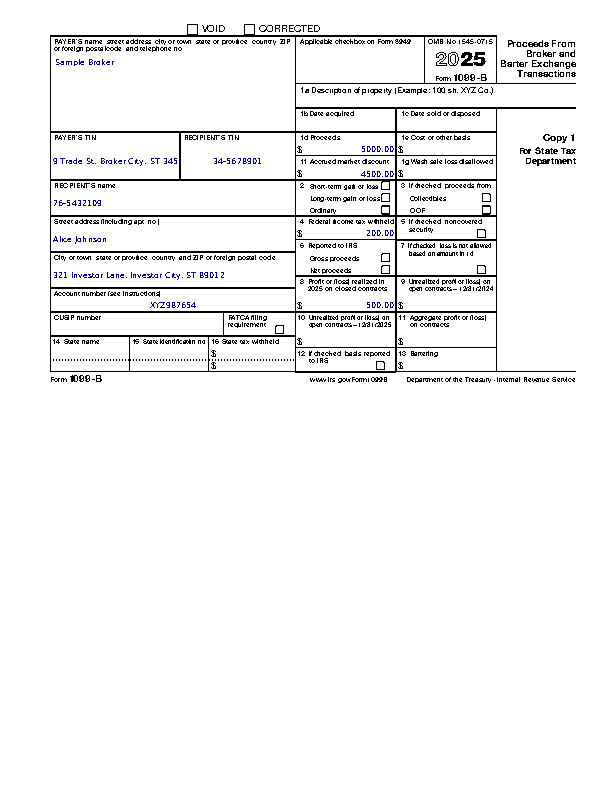

In [4]:
image_of_page = page.to_image()
image_of_page

#### .extract_table returns a list of lists, with each inner list representing a row in the table. Here are the first three rows:



In [5]:
extracted_table_from_pdf = page.extract_table()

In [6]:
extracted_table_from_pdf

[['PAYER’S name, street address, city or town, state or province, country, ZIP\nor foreign postal code, and telephone no.\nSample Broker',
  None,
  None,
  None,
  None,
  'Applicable checkbox on Form 8949',
  None,
  'OMB No. 1545-0715\n2025\nForm 1099-B'],
 [None,
  None,
  None,
  None,
  None,
  '1b Date acquired',
  '1c Date sold or disposed',
  None],
 ['PAYER’S TIN\n89 Trade St, Broker City, ST 345',
  None,
  'RECIPIENT’S TIN\n67 34-5678901',
  None,
  None,
  '1d Proceeds\n$ 5000.00',
  '1e Cost or other basis\n$',
  None],
 [None,
  None,
  None,
  None,
  None,
  '1f Accrued market discount\n$ 4500.00',
  '1g Wash sale loss disallowed\n$',
  None],
 ['RECIPIENT’S name\n76-5432109',
  None,
  None,
  None,
  None,
  '2 Short-term gain or loss\nLong-term gain or loss\nOrdinary',
  '3 If checked, proceeds from:\nCollectibles\nQOF',
  None],
 ['Street address (including apt. no.)\nAlice Johnson',
  None,
  None,
  None,
  None,
  '4 Federal income tax withheld\n$ 200.00',
  '5 

In [7]:
import pandas as pd

In [9]:
df = pd.DataFrame(extracted_table_from_pdf[1:])
df

,0,1,2,3,4,5,6,7
0,None,None,None,None,None,1b Date acquired,1c Date sold or disposed,None
1,"PAYER’S TIN\n89 Trade St, Broker City, ST 345",None,RECIPIENT’S TIN\n67 34-5678901,None,None,1d Proceeds\n$ 5000.00,1e Cost or other basis\n$,None
2,None,None,None,None,None,1f Accrued market discount\n$ 4500.00,1g Wash sale loss disallowed\n$,None
3,RECIPIENT’S name\n76-5432109,None,None,None,None,2 Short-term gain or loss\nLong-term gain or l...,"3 If checked, proceeds from:\nCollectibles\nQOF",None
4,Street address (including apt. no.)\nAlice Joh...,None,None,None,None,4 Federal income tax withheld\n$ 200.00,"5 If checked, noncovered\nsecurity",None
5,None,None,None,None,None,6 Reported to IRS:\nGross proceeds\nNet proceeds,"7 If checked, loss is not allowed\nbased on am...",None
6,"City or town, state or province, country, and ...",None,None,None,None,None,None,None
7,None,None,None,None,None,8 Profit or (loss) realized in\n2025 on closed...,9 Unrealized profit or (loss) on\nopen contrac...,None
8,Account number (see instructions)\nXYZ987654,None,None,None,None,None,None,None
9,CUSIP number,None,None,None,FATCA filing\nrequirement,10 Unrealized profit or (loss) on\nopen contra...,11 Aggregate profit or (loss)\non contracts\n$,None


#### ChatGPT modified solution attempt but it reads from left to right, bad output


In [ ]:
import pdfplumber


def extract_boxes(pdf_path):
    data = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            words = page.extract_words(use_text_flow=True)  # Extract words with positions
            elements = []  # Store detected fields

            for word in words:
                x0, top, x1, bottom = word["x0"], word["top"], word["x1"], word["bottom"]
                text = word["text"]
                
                # Check if this word belongs to an existing box (grouping based on proximity)
                matched = False
                for element in elements:
                    ex0, etop, ex1, ebottom, etext = element
                    if abs(top - etop) < 12:  # Adjust threshold to match line heights
                        element[4] += " " + text
                        matched = True
                        break
                
                if not matched:
                    elements.append([x0, top, x1, bottom, text])

            # Convert grouped elements into key-value pairs
            structured_data = {}
            for element in elements:
                _, _, _, _, text = element
                if ":" in text:
                    key, value = text.split(":", 1)
                    structured_data[key.strip()] = value.strip()
                else:
                    structured_data[text.strip()] = ""

            data.append(structured_data)

    return data

# Example usage
pdf_path = "./filled_flat/f1099b_filled-flat.pdf"
form_data = extract_boxes(pdf_path)

for field, value in form_data[0].items():
    print(f"{field}: {value}")


Form 1099-B Transactions 1a Description of property (Example: 100 sh. XYZ Co.)
2025 Proceeds From Broker and Barter Exchange or foreign postal code, and telephone no. Sample Broker: 
Copy 1 PAYER’S TIN RECIPIENT’S TIN 1d Proceeds $ 1e Cost or other basis $: 
For State Tax Department 1f Accrued market discount 1g Wash sale loss disallowed 789 Trade St, Broker City, ST 34567 34-5678901 5000.00: 
Department of the Treasury - Internal Revenue Service Form 1099-B www.irs.gov/Form1099B: 
OMB No. 1545-0715 PAYER’S name, street address, city or town, state or province, country, ZIP Applicable checkbox on Form 8949: 
VOID CORRECTED: 
RECIPIENT’S name 2 Short-term gain or loss 3 If checked, proceeds from: 
Street address (including apt. no.) Ordinary QOF 4 Federal income tax withheld $ 5 If checked, noncovered security 200.00: 
City or town, state or province, country, and ZIP or foreign postal code 6 Reported to IRS: Gross proceeds 7 If checked, loss is not allowed based on amount in 1d
Account

#### Chatgpt modified solution attempts, following reads vertically but its skipping text, bad output

In [11]:
import pdfplumber

def extract_vertical_fields(pdf_path):
    data = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            words = page.extract_words(use_text_flow=True)  # Extract words with positions
            elements = []  # Store detected fields

            for word in words:
                x0, top, x1, bottom, text = word["x0"], word["top"], word["x1"], word["bottom"], word["text"]
                elements.append((x0, top, x1, bottom, text))

            # Sort elements by X (left-to-right) and then by Y (top-to-bottom)
            elements.sort(key=lambda e: (e[0], e[1]))

            structured_data = {}
            column_groups = {}  # Group text vertically by X position

            for x0, top, x1, bottom, text in elements:
                col_key = round(x0, 1)  # Group elements by X position
                if col_key not in column_groups:
                    column_groups[col_key] = []
                column_groups[col_key].append((top, text))

            # Process each column group (assume header is above value)
            for col, items in column_groups.items():
                items.sort()  # Sort by Y (top to bottom)
                for i in range(len(items) - 1):
                    header, value = items[i][1], items[i + 1][1]
                    structured_data[header] = value

            data.append(structured_data)

    return data

# Example usage
pdf_path = "./filled_flat/f1099b_filled-flat.pdf"
form_data = extract_vertical_fields(pdf_path)

for field, value in form_data[0].items():
    print(f"{field}: {value}")


76-5432109: Alice
Alice: 321
PAYER’S: RECIPIENT’S
or: 1099-B
RECIPIENT’S: Street
Street: City
City: Account
Account: CUSIP
name,: TIN
16: $
$: 13
FATCA: requirement
10: $
Applicable: 1a
1a: 1b
1b: 1d
1d: 1f
1f: 2
2: 4
4: 6
6: 8
Reported: Profit
Unrealized: If
open: to
Short-term: Long-term
Long-term: Ordinary
Ordinary: Gross
Gross: Net
Date: Cost
Proceeds: Accrued
Accrued: www.irs.gov/Form1099B
checkbox: (loss)
5000.00: 4500.00
200.00: 500.00
11: $
13: $
1c: 1e
1e: 1g
1g: 3
3: 5
5: 7
7: 9
If: Unrealized
security: based
based: open
Aggregate: Bartering
Collectibles: QOF
checked,: checked,
loss: proceeds
proceeds: noncovered
1099-B: is


#### Reading box by box from left to right attempt


In [1]:
import pdfplumber

def extract_boxes_horizontally(pdf_path):
    data = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            words = page.extract_words(use_text_flow=True)  # Extract words with positions
            boxes = []  # Stores grouped text within boxes

            # Step 1: Group words into boxes based on their positions
            for word in words:
                x0, top, x1, bottom, text = word["x0"], word["top"], word["x1"], word["bottom"], word["text"]
                
                matched = False
                for box in boxes:
                    bx0, btop, bx1, bbottom, texts = box
                    # If the text is inside an existing box (same X range and similar Y position)
                    if abs(x0 - bx0) < 15 and abs(top - btop) < 15:
                        box[4].append((top, text))  # Append text with Y position
                        matched = True
                        break
                
                if not matched:
                    boxes.append([x0, top, x1, bottom, [(top, text)]])

            # Step 2: Sort boxes left to right
            boxes.sort(key=lambda b: b[0])  # Sort by X position

            structured_data = {}

            # Step 3: Process each box: extract header (top text) and value (bottom text)
            for box in boxes:
                _, _, _, _, text_items = box
                text_items.sort()  # Sort text inside the box by Y position (top to bottom)

                if len(text_items) >= 2:  # Ensure we have both header and value
                    header, value = text_items[0][1], text_items[1][1]
                    structured_data[header] = value
                elif len(text_items) == 1:  # Handle cases where only one text exists
                    structured_data[text_items[0][1]] = ""

            data.append(structured_data)

    return data

# Example usage
pdf_path = "./filled_flat/f1099b_filled-flat.pdf"
form_data = extract_boxes_horizontally(pdf_path)

for field, value in form_data[0].items():
    print(f"{field}: {value}")


789: 
Form: 100
State: 
76-5432109: 
Alice: 
321: 
PAYER’S: 
RECIPIENT’S: 
Street: 
City: or
Account: 
CUSIP: 
Sample: 
Trade: 
1099-B: XYZ
Investor: 
address: 
Johnson: 
town,: no.
number: 
name: 
name,: postal
TIN: 
Broker: Exchange
state: 
(including: 
Lane,: 
street: code,
(see: instructions)
or: other
address,: and
City,: 
apt.: no.)
34567: ST
XYZ987654: 
country,: 
city: or
identification: 
ZIP: 
89012: ST
no.: 16
VOID: or
foreign: or
$: 
34-5678901: 
province,: 
FATCA: requirement
postal: 
tax: withheld
filing: 
CORRECTED: country,
code: 
Applicable: 
Description: 1a
Date: 1c
Proceeds: 
Accrued: 1f
2: Short-term
Profit: 8
open: 
Ordinary: Federal
Gross: Net
www.irs.gov/Form1099B: 
checked,: IRS
contracts—12/31/2025: 
(loss): or
acquired: 
income: 
checkbox: 
market: 
IRS:: to
profit: 
gain: or
basis: 
realized: contracts
of: the
500.00: (loss)
5000.00: discount
reported: 
loss: sale
in: 
on: 
(Example:: 
8949: 
Cost: 1e
Wash: 1g
If: checked,
Unrealized: 9
Department: 
security: 

# Not using pdfplumber for any other files since BAD OUTPUT